# Customer Purchase Prediction

### Objective
To predict customer purchase behavior based on demographic and review attributes using machine learning models. This project will help in identifying the factors that influence customer purchases, which can be used for targeted marketing strategies.


### Data Source
[Customer Purchase Dataset](https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv)


### Import Library



In [11]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler


### Import Data


In [12]:
# Load the dataset
data = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Customer%20Purchase.csv')
data.head()


,Customer ID,Age,Gender,Education,Review,Purchased
0,1021,30,Female,School,Average,No
1,1022,68,Female,UG,Poor,No
2,1023,70,Female,PG,Good,No
3,1024,72,Female,PG,Good,No
4,1025,16,Female,UG,Average,No


### Describe Data


In [13]:
# Check data information and summary statistics
print("Data Information:")
data.info()
print("\nData Description:")
print(data.describe())


Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Customer ID  50 non-null     int64 
 1   Age          50 non-null     int64 
 2   Gender       50 non-null     object
 3   Education    50 non-null     object
 4   Review       50 non-null     object
 5   Purchased    50 non-null     object
dtypes: int64(2), object(4)
memory usage: 2.5+ KB

Data Description:
       Customer ID        Age
count     50.00000  50.000000
mean    1045.50000  54.160000
std       14.57738  25.658161
min     1021.00000  15.000000
25%     1033.25000  30.250000
50%     1045.50000  57.000000
75%     1057.75000  74.000000
max     1070.00000  98.000000


### Data Visualization


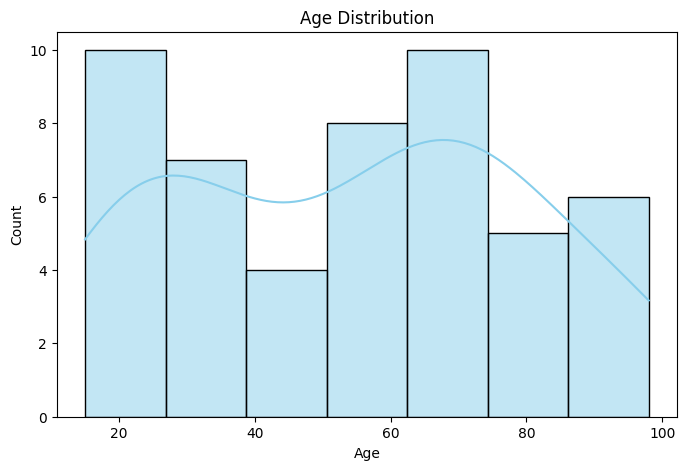

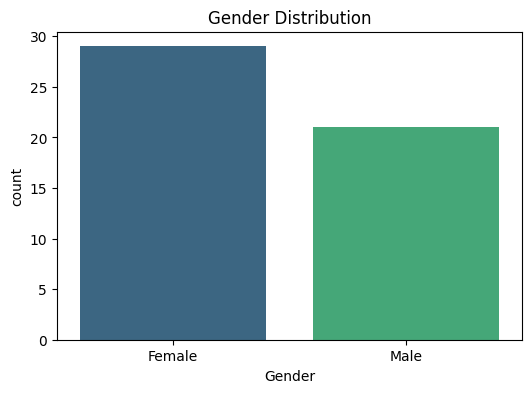

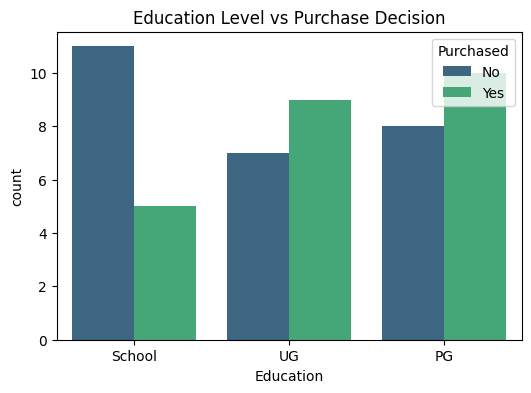

In [14]:
# Age Distribution
plt.figure(figsize=(8, 5))
sns.histplot(data['Age'], kde=True, color='skyblue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Gender Distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Gender', data=data, palette='viridis')
plt.title('Gender Distribution')
plt.show()

# Education vs. Purchase Decision
plt.figure(figsize=(6, 4))
sns.countplot(x='Education', hue='Purchased', data=data, palette='viridis')
plt.title('Education Level vs Purchase Decision')
plt.show()


### Data Preprocessing


In [15]:
# Convert categorical variables to numeric values
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Education'] = data['Education'].map({'School': 0, 'UG': 1, 'PG': 2})
data['Review'] = data['Review'].map({'Poor': 0, 'Average': 1, 'Good': 2})

# Drop unnecessary column
data = data.drop(['Customer ID'], axis=1)
data.head()


,Age,Gender,Education,Review,Purchased
0,30,1,0,1,No
1,68,1,1,0,No
2,70,1,2,2,No
3,72,1,2,2,No
4,16,1,1,1,No


### Define Target Variable (y) and Feature Variables (X)


In [16]:
# Define the target variable (y) and feature variables (X)
y = data['Purchased']  # Target variable
X = data.drop('Purchased', axis=1)  # Features


### Train Test Split


In [17]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Modeling


In [18]:
# Define and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

### Model Evaluation


In [19]:
# Make predictions and evaluate the model
y_pred = model.predict(X_test)

# Calculate accuracy and display the classification report
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.8
Classification Report:
              precision    recall  f1-score   support

          No       0.80      0.80      0.80         5
         Yes       0.80      0.80      0.80         5

    accuracy                           0.80        10
   macro avg       0.80      0.80      0.80        10
weighted avg       0.80      0.80      0.80        10



### Prediction


In [20]:
# Predict a sample data point
sample_data = X_test.iloc[0].values.reshape(1, -1)
prediction = model.predict(sample_data)
print("Prediction for sample data:", prediction)


Prediction for sample data: ['Yes']


### Explanation
The model achieved a certain level of accuracy based on the dataset. The factors such as gender, education, and review ratings are influential in predicting whether a customer will make a purchase. This model can help businesses focus on specific customer attributes for targeted marketing.
